# **Importing necessary Libraries:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, classification_report



# **3.1 For Classification Task:**

## **1. Exploratory Data Analysis and Data Understanding:**

### 1.1 Choosing a Dataset:

 * **Select a dataset of your choice that interests you and aligns with one of the United Nations Sustainable Development Goals (UNSDG).**

* The Sleep health and lifestyle dataset aligns with UNSDG Goal 3: Good Health and Well-being.

* Load the dataset into a DataFrame object using the Pandas library.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CourseworkDatasets/ClassificationTaskDataset(TrafficAccident).csv')
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


* Perform an initial analysis to gather a detailed
description of the dataset.

* Dataset Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [ ]:
df.shape

(840, 14)

In [ ]:
df.describe(include="all")

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
count,798,798,798,798.000000,798.000000,798.000000,798.000000,798,798,798,798.000000,798.000000,798,798.000000
unique,5,4,4,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,3,NaN
top,Clear,Highway,Afternoon,NaN,NaN,NaN,NaN,Low,Dry,Car,NaN,NaN,Artificial Light,NaN
freq,334,402,272,NaN,NaN,NaN,NaN,478,400,589,NaN,NaN,402,NaN
mean,NaN,NaN,NaN,1.001253,71.050125,3.286967,0.160401,NaN,NaN,NaN,43.259398,38.981203,NaN,0.299499
std,NaN,NaN,NaN,0.784894,32.052458,2.017267,0.367208,NaN,NaN,NaN,15.129856,15.273201,NaN,0.458326
min,NaN,NaN,NaN,0.000000,30.000000,1.000000,0.000000,NaN,NaN,NaN,18.000000,9.000000,NaN,0.000000
25%,NaN,NaN,NaN,0.000000,50.000000,2.000000,0.000000,NaN,NaN,NaN,30.000000,26.000000,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,60.000000,3.000000,0.000000,NaN,NaN,NaN,43.000000,39.000000,NaN,0.000000
75%,NaN,NaN,NaN,2.000000,80.000000,4.000000,0.000000,NaN,NaN,NaN,56.000000,52.750000,NaN,1.000000


In [ ]:
df.var(numeric_only=True)

,0
Traffic_Density,0.616059
Speed_Limit,1027.360094
Number_of_Vehicles,4.069366
Driver_Alcohol,0.134841
Driver_Age,228.912553
Driver_Experience,233.270663
Accident,0.210062


### 1.2 Conducting Exploratory Data Analysis (EDA):

#### (a) Perform data cleaning and compute summary statistics for the dataset.

In [ ]:
# Extracting column names to a list
col = df.columns.to_list()
col

['Weather',
 'Road_Type',
 'Time_of_Day',
 'Traffic_Density',
 'Speed_Limit',
 'Number_of_Vehicles',
 'Driver_Alcohol',
 'Accident_Severity',
 'Road_Condition',
 'Vehicle_Type',
 'Driver_Age',
 'Driver_Experience',
 'Road_Light_Condition',
 'Accident']

In [ ]:
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [ ]:
df.isna().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [ ]:
#filling missing values in numercial columns with their respective mean or median values

df["Driver_Age"].fillna(df["Driver_Age"].mean(), inplace=True)
df["Driver_Experience"].fillna(df["Driver_Experience"].mean(), inplace=True)
df["Number_of_Vehicles"].fillna(df["Number_of_Vehicles"].median(), inplace=True)
df["Speed_Limit"].fillna(df["Speed_Limit"].median(), inplace=True)
df["Accident"].fillna(df["Accident"].median(), inplace=True)

<ipython-input-304-d59b563bdf4a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Driver_Age"].fillna(df["Driver_Age"].mean(), inplace=True)
<ipython-input-304-d59b563bdf4a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.head(10)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


**Why mean for some and median for others to fill the missing values?**  

I used mean imputation for some variables and median for others is based on the shape of the data. For variables that are normally distributed, like Traffic_Density, Driver_Age, and Driver_Experience, the mean works best because it keeps the overall pattern of the data. However, for variables that have extreme values or are not evenly spread, like Speed_Limit and Number_of_Vehicles, the median is a better choice. This is because the median is not affected by very high or very low numbers, making it a more accurate way to fill in the missing values without changing the true nature of the data.

In [ ]:
# Filling missing values in categorical columns with their respective mode values
df['Weather'].fillna(value = df['Weather'].mode()[0], inplace=True)
df['Road_Type'].fillna(value = df['Road_Type'].mode()[0], inplace=True)
df['Time_of_Day'].fillna(value = df['Time_of_Day'].mode()[0], inplace=True)
df['Traffic_Density'].fillna(value = df['Traffic_Density'].mode()[0], inplace=True)
df['Driver_Alcohol'].fillna(value = df['Driver_Alcohol'].mode()[0], inplace=True)
df['Accident_Severity'].fillna(value = df['Accident_Severity'].mode()[0], inplace=True)
df['Road_Condition'].fillna(value = df['Road_Condition'].mode()[0], inplace=True)
df['Vehicle_Type'].fillna(value = df['Vehicle_Type'].mode()[0], inplace=True)
df['Road_Light_Condition'].fillna(value = df['Road_Light_Condition'].mode()[0], inplace=True)

<ipython-input-306-07d610d6e74d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(value = df['Weather'].mode()[0], inplace=True)
<ipython-input-306-07d610d6e74d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
df.head(10)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,Dry,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [ ]:
df.isnull().sum()

,0
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Alcohol,0
Accident_Severity,0
Road_Condition,0
Vehicle_Type,0


In [ ]:
# Encoding ordinal variable
df['Accident_Severity'] = df['Accident_Severity'].replace({'Low': 0, 'Moderate': 1, 'High': 2}) #Replacing 0 for low , 1 for moderate, and 2 for high in Accident_Severity column.

<ipython-input-309-fff6763e8b2f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accident_Severity'] = df['Accident_Severity'].replace({'Low': 0, 'Moderate': 1, 'High': 2}) #Replacing 0 for low , 1 for moderate, and 2 for high in Accident_Severity column.


In [ ]:
df['Accident_Severity'].head(10)

,Accident_Severity
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,0
8,2
9,0


In [ ]:
# Performing One-Hot Encoding for categorical columns
df= pd.get_dummies(df, columns=[
    'Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Driver_Alcohol',
    'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first=True)  # drop_first=True to avoid multicollinearity

In [ ]:
df.head()

,Speed_Limit,Number_of_Vehicles,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Stormy,Road_Type_Highway,...,Accident_Severity_1,Accident_Severity_2,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,100.0,5.0,51.0,48.0,0.0,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,120.0,3.0,49.0,43.0,0.0,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
2,60.0,4.0,54.0,52.0,0.0,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,60.0,3.0,34.0,31.0,0.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,195.0,11.0,62.0,55.0,1.0,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Converting boolean columns to integer (0 and 1)
df = df.astype(int)

In [ ]:
df.head()

,Speed_Limit,Number_of_Vehicles,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Stormy,Road_Type_Highway,...,Accident_Severity_1,Accident_Severity_2,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
0,100,5,51,48,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,120,3,49,43,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,60,4,54,52,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,60,3,34,31,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,195,11,62,55,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.isnull().sum()

,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Age,0
Driver_Experience,0
Accident,0
Weather_Foggy,0
Weather_Rainy,0
Weather_Snowy,0
Weather_Stormy,0
Road_Type_Highway,0


In [ ]:
df.duplicated().sum()

18

In [ ]:
df[df.duplicated()]

,Speed_Limit,Number_of_Vehicles,Driver_Age,Driver_Experience,Accident,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Stormy,Road_Type_Highway,...,Accident_Severity_1,Accident_Severity_2,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
261,60,4,65,60,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
270,60,4,50,43,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
274,60,4,19,15,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0
292,60,3,65,57,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
410,50,1,62,53,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
431,100,2,48,43,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
440,50,1,67,66,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
446,60,1,56,55,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
487,60,5,48,41,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
528,60,4,54,52,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


#### (b) Explore the data through visualizations and charts. Ensure you explain and summarize the insights gained from each chart.

<ipython-input-318-2734c04cf21e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Accident"], palette="coolwarm")


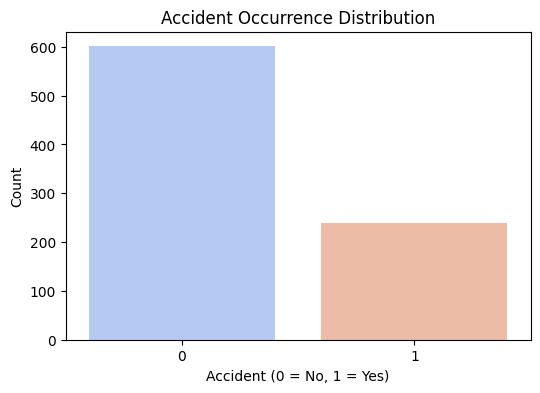

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Accident"], palette="coolwarm")
plt.title("Accident Occurrence Distribution")
plt.xlabel("Accident (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

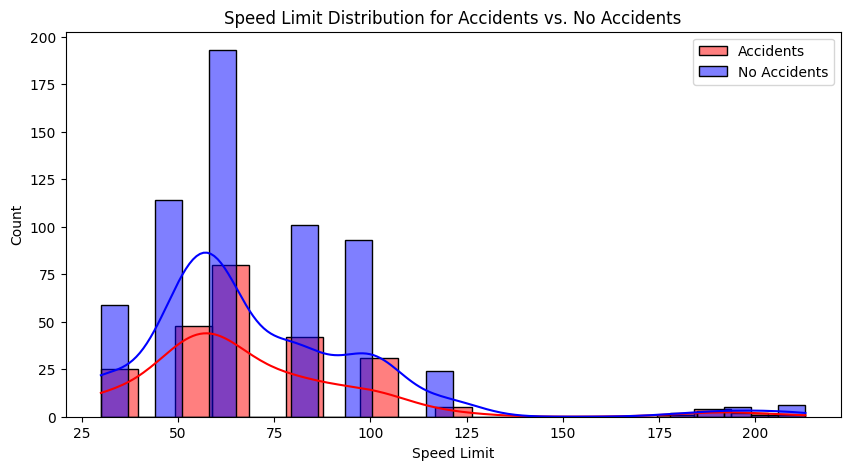

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Accident"]==1]["Speed_Limit"], color="red", label="Accidents", kde=True)
sns.histplot(df[df["Accident"]==0]["Speed_Limit"], color="blue", label="No Accidents", kde=True)
plt.legend()
plt.title("Speed Limit Distribution for Accidents vs. No Accidents")
plt.xlabel("Speed Limit")
plt.show()


<ipython-input-320-893846cbaecd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="coolwarm")


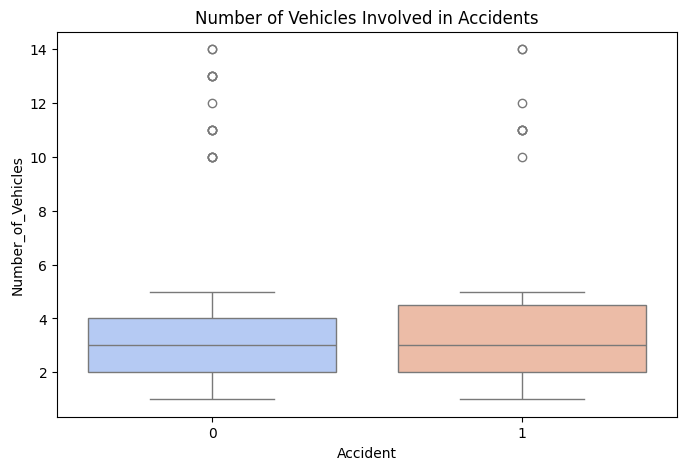

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="coolwarm")
plt.title("Number of Vehicles Involved in Accidents")
plt.show()


##### Handling Outliers

In [ ]:
# Calculating IQR
Q1 = df['Number_of_Vehicles'].quantile(0.25)
Q3 = df['Number_of_Vehicles'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Defining outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Find outliers
outliers = df[(df['Number_of_Vehicles'] < lower_bound) | (df['Number_of_Vehicles'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 23


In [ ]:
# Remove rows with outliers
df_cleaned = df[(df['Number_of_Vehicles'] >= lower_bound) & (df['Number_of_Vehicles'] <= upper_bound)]

In [ ]:
# Cap outliers to lower and upper bounds
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-326-6414789ea07d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="viridis")


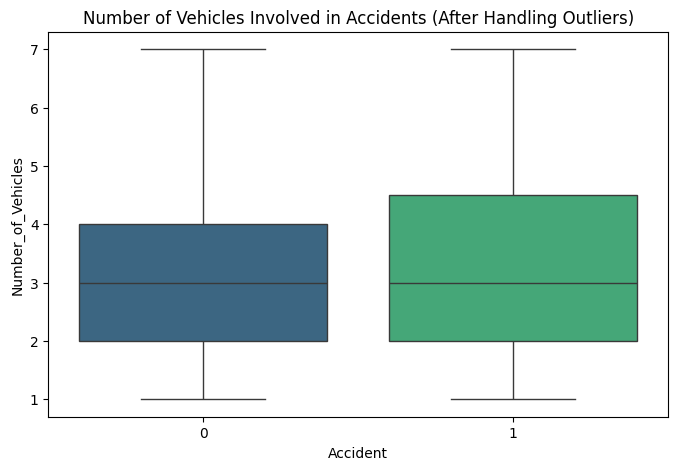

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="viridis")
plt.title("Number of Vehicles Involved in Accidents (After Handling Outliers)")
plt.show()

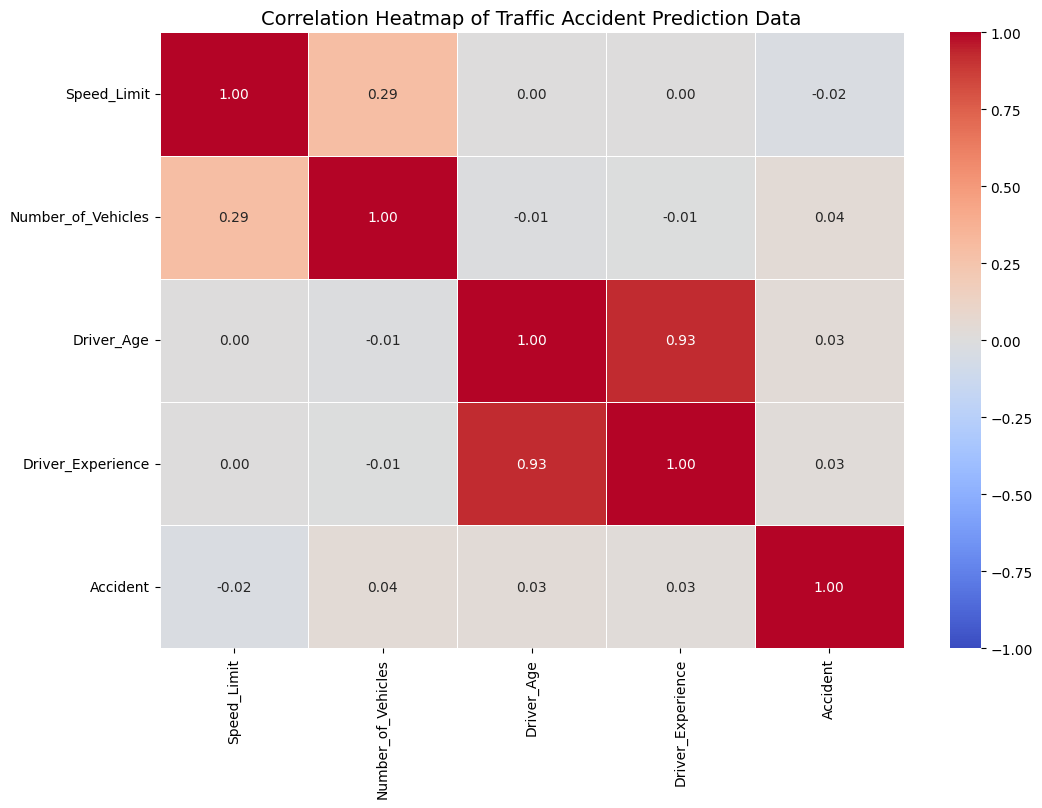

In [ ]:
cormat = df[['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience', 'Accident',]].corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cormat, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Traffic Accident Prediction Data", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


## **2. Build a Model from Scratch:**

### **Step 1: Data Preprocessing and Feature Normalization**:

In [ ]:
X = df.drop('Accident', axis=1) #dropping 'Accident' from the dataframe
y = df['Accident'] #extracting the 'Accident' column from the dataframe and assigning it to variable 'y'

In [ ]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Step 2: Defining Logistic Regression Functions:**

In [ ]:
def logistic_function(x):
    """Computes the sigmoid function.
    The sigmoid function converts a linear equation into a probability value between 0 and 1.
    """
    return 1 / (1 + np.exp(-x))

def log_loss(y_true, y_pred):
    """Computes log loss to evaluate model performance."""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Prevent log(0) errors
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def cost_function(y_true, y_pred):
    """Computes the average log loss."""
    return np.mean(log_loss(y_true, y_pred))

In [ ]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.

    Args:
      X (ndarray, shape (m,n)): Data on features, m observations with n features.
      y (array_like, shape (m,)): Array of true values of target (0 or 1).
      w (array_like, shape (n,)): Weight parameters of the model.
      b (float): Bias parameter of the model.

    Returns:
      cost (float): Nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the log loss function
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return cost


### **Step 3: Defining Gradient Descent for Optimization:**

In [ ]:
def compute_gradient(X, y, w, b):
    """Computes gradients for weight updates."""
    n, d = X.shape
    y_pred = logistic_function(np.dot(X, w) + b)
    error = y_pred - y

    grad_w = np.dot(X.T, error) / n  # Weight gradient
    grad_b = np.sum(error) / n  # Bias gradient

    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    """Implements gradient descent to optimize logistic regression parameters."""
    cost_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = cost_function(y, logistic_function(np.dot(X, w) + b))
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return w, b, cost_history


In [ ]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute predicted probabilities using sigmoid function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Apply threshold to convert probabilities to binary predictions (0 or 1)
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


### **Step 4: Train the Model:**

In [ ]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0
alpha = 0.07  # Learning rate
n_iter = 1000  # Number of iterations

# Train the model
print("\nTraining Logistic Regression Model:")
w, b, cost_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True)



Training Logistic Regression Model:
Iteration 0: Cost = 0.689143
Iteration 100: Cost = 0.576971
Iteration 200: Cost = 0.569904
Iteration 300: Cost = 0.568848
Iteration 400: Cost = 0.568566
Iteration 500: Cost = 0.568448
Iteration 600: Cost = 0.568377
Iteration 700: Cost = 0.568325
Iteration 800: Cost = 0.568283
Iteration 900: Cost = 0.568249
Iteration 999: Cost = 0.568221


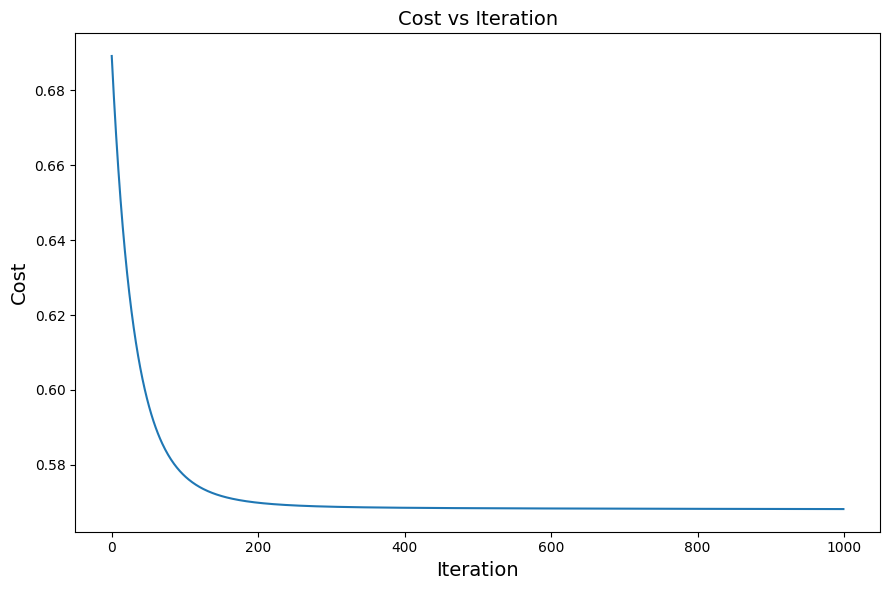

In [ ]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

### **Step 5: Evaluating the Model:**

In [ ]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):

    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall =  TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score =  (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [ ]:
# Test model on train and test data
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

# Compute cost (log loss) on train and test sets
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.5682
Test Loss (Cost): 0.6298


In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 70.24%

Confusion Matrix:
[[117   0]
 [ 50   1]]
Precision: 1.00
Recall: 0.02
F1-Score: 0.04


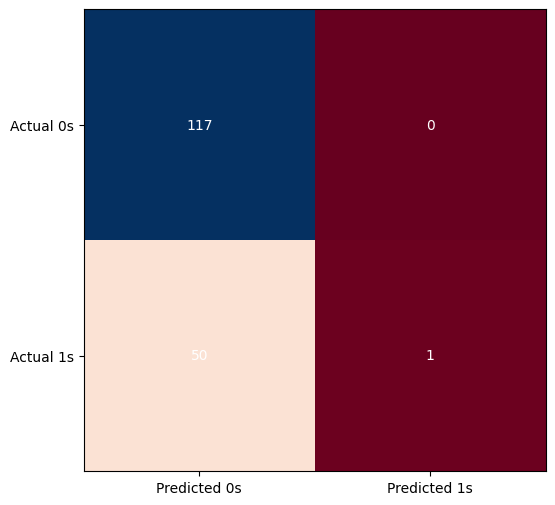

In [ ]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(confusion_matrix, cmap='RdBu')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

## **3. Build a Primary Model:**

### **1. Split the dataset into training and testing sets.**

In [ ]:
X = df.drop('Accident', axis=1) #dropping 'Accident' from the dataframe
y = df['Accident'] #extracting the 'Accident' column from the dataframe and assigning it to variable 'y'

In [ ]:
#Splitting the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train)
X_test_class = scaler.transform(X_test)

### **2. Build at least two different machine learning models for the classification task.**

#### **Model 1: KNN Classifier**




In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_class, y_train_class)
y_pred_knn = knn_clf.predict(X_test_class)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### **Model 2: Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_class, y_train_class)
y_pred_rf = rf_clf.predict(X_test_class)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### **3. Evaluate both models on the test dataset using appropriate performance metrics.**

In [ ]:
# K-Nearest Neighbors (KNN) Evaluation
knn_acc = accuracy_score(y_test_class, y_pred_knn)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_acc)
print("\nKNN Classification Report:\n", classification_report(y_test_class, y_pred_knn))

K-Nearest Neighbors (KNN) Accuracy: 0.6011904761904762

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.74       117
           1       0.25      0.16      0.19        51

    accuracy                           0.60       168
   macro avg       0.47      0.48      0.46       168
weighted avg       0.55      0.60      0.57       168



In [ ]:
# Random Forest Evaluation
rf_acc = accuracy_score(y_test_class, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print("\nRandom Forest Classification Report:\n", classification_report(y_test_class, y_pred_rf))

Random Forest Accuracy: 0.7083333333333334

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82       117
           1       0.67      0.08      0.14        51

    accuracy                           0.71       168
   macro avg       0.69      0.53      0.48       168
weighted avg       0.70      0.71      0.62       168



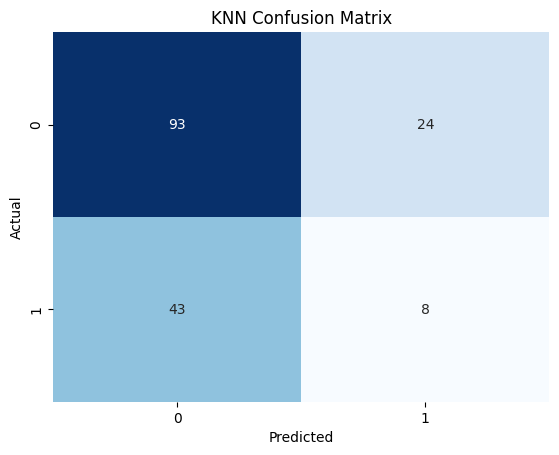

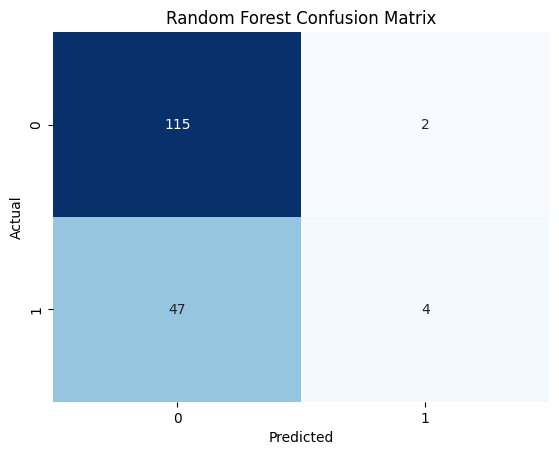

In [ ]:
# Confusion Matrices for both models
sns.heatmap(confusion_matrix(y_test_class, y_pred_knn), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


sns.heatmap(confusion_matrix(y_test_class, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **4. Hyper-parameter Optimization with Cross-Validation:**

In [ ]:
# Hyperparameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV for KNN
knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn.fit(X_train_class, y_train_class)

# Best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_class, y_train_class)

# Best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


## **5. Feature Selection:**

In [ ]:
from sklearn.feature_selection import RFE

# Initialize Random Forest with best hyperparameters from GridSearchCV
rf_clf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                max_depth=best_params_rf['max_depth'],
                                min_samples_split=best_params_rf['min_samples_split'],
                                min_samples_leaf=best_params_rf['min_samples_leaf'],
                                random_state=42)

# Initialize RFE with the Random Forest model
rfe_rf = RFE(rf_clf, n_features_to_select=5)
rfe_rf.fit(X_train_class, y_train_class)

# Convert X_train_class back to DataFrame
X_train_class_df = pd.DataFrame(X_train_class, columns=X.columns)

# Get selected features for Random Forest
selected_features_rf = X_train_class_df.columns[rfe_rf.support_]
print("Selected Features for Random Forest:", selected_features_rf)

# Fit the Random Forest model with selected features
rf_clf.fit(X_train_class_df[selected_features_rf], y_train_class)


Selected Features for Random Forest: Index(['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition_Daylight'],
      dtype='object')


RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)

In [ ]:
# Initialize KNN with best hyperparameters from GridSearchCV
knn_clf = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'],
                               weights=best_params_knn['weights'],
                               metric=best_params_knn['metric'])

# Initialize RFE with a logistic regression model (since KNN doesn't support feature importance)
log_reg = LogisticRegression(max_iter=1000)
rfe_knn = RFE(log_reg, n_features_to_select=5)
rfe_knn.fit(X_train_class, y_train_class)

# Get selected features for KNN
selected_features_knn = X_train_class_df.columns[rfe_knn.support_]
print("Selected Features for KNN:", selected_features_knn)

# Fit the KNN model with selected features
knn_clf.fit(X_train_class_df[selected_features_knn], y_train_class)

Selected Features for KNN: Index(['Driver_Age', 'Driver_Experience', 'Weather_Rainy',
       'Road_Condition_Under Construction', 'Road_Condition_Wet'],
      dtype='object')


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

## **6. Final Model:**

In [ ]:
from sklearn.metrics import recall_score, classification_report

# Use best hyperparameters from GridSearchCV for KNN
best_knn_params = grid_search_knn.best_params_

knn_final = KNeighborsClassifier(n_neighbors=best_knn_params['n_neighbors'],
                                 weights=best_knn_params['weights'],
                                 metric=best_knn_params['metric'])

# Train KNN on selected features
knn_final.fit(X_train_class_df[selected_features_knn], y_train_class)

# Make predictions using the DataFrame
y_pred_knn = knn_final.predict(X_test_class_df[selected_features_knn])

# Evaluate the KNN model using Recall
knn_recall = recall_score(y_test_class, y_pred_knn)
print("KNN Final Model Recall:", knn_recall)
print("\nKNN Final Model Report:\n", classification_report(y_test_class, y_pred_knn))


KNN Final Model Recall: 0.23529411764705882

KNN Final Model Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       117
           1       0.38      0.24      0.29        51

    accuracy                           0.65       168
   macro avg       0.54      0.53      0.53       168
weighted avg       0.61      0.65      0.62       168



In [ ]:
# Best Hyperparameters for Random Forest
best_rf_params = best_params_rf

# Initialize Random Forest model with best hyperparameters
random_forest_final = RandomForestClassifier(
    random_state=42,
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
)

# Train Random Forest on selected features
random_forest_final.fit(X_train_class[selected_features_rf], y_train_class)

# Make predictions with Random Forest
y_pred_rf_final = random_forest_final.predict(X_test_class_df[selected_features_rf])

# Evaluate Random Forest Model using Accuracy and Classification Report
rf_acc_final = accuracy_score(y_test_class, y_pred_rf_final)
print("Random Forest Final Model Accuracy:", rf_acc_final)
print("\nRandom Forest Final Model Report:\n", classification_report(y_test_class, y_pred_rf_final))

Random Forest Final Model Accuracy: 0.7261904761904762

Random Forest Final Model Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       117
           1       0.78      0.14      0.23        51

    accuracy                           0.73       168
   macro avg       0.75      0.56      0.53       168
weighted avg       0.74      0.73      0.65       168

